# LetsGrowMore Virtual Internship October -2022 #

# Task-2 : Stock Market Prediction And Forecasting Using Stacked LSTM #

# Designed by - Sujith M #





### Importing Libraries ###


In [70]:
import pandas as pd
import numpy as np
import seaborn as sb
import math
import matplotlib.pyplot as plt

# For time stamps
from datetime import datetime

# Styling the graphs
plt.style.use('seaborn-darkgrid')
sb.set_style('whitegrid')

## Reading Data


In [71]:
# Reading data from remote link
url = "https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(10)

Data imported successfully


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [72]:
s_data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [73]:
s_data['Date'].value_counts()

2018-09-28    1
2013-04-10    1
2013-03-20    1
2013-03-21    1
2013-03-22    1
             ..
2016-01-11    1
2016-01-12    1
2016-01-13    1
2016-01-14    1
2010-07-21    1
Name: Date, Length: 2035, dtype: int64

In [74]:
s_data.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

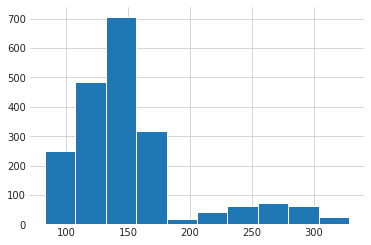

In [75]:
s_data['High'].hist()

<Figure size 1440x576 with 0 Axes>

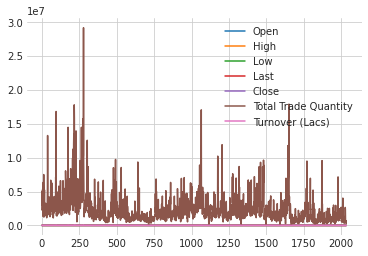

In [76]:
plt.figure(figsize=(20,8))
s_data.plot()

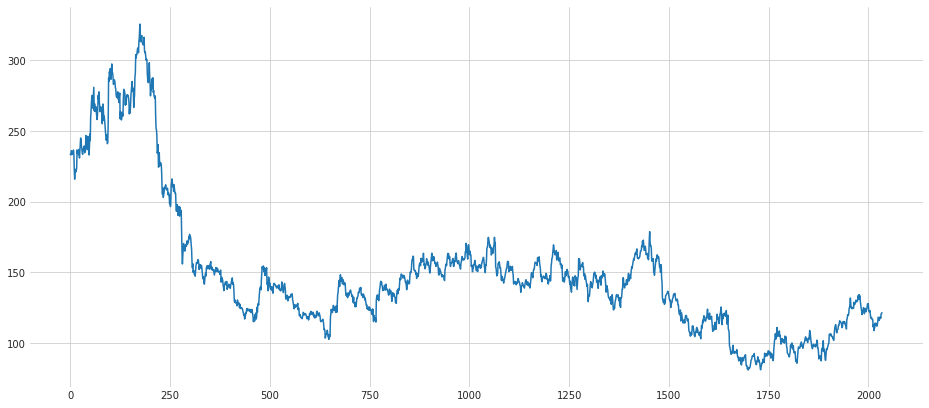

In [77]:
# Historical Graph of the closing price
plt.figure(figsize=(16, 7))
plt.plot(s_data['Close'])
plt.show()

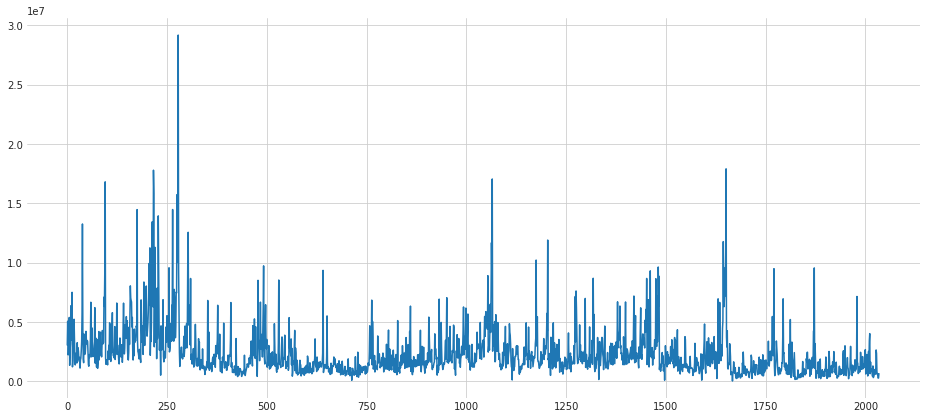

In [78]:
# Volume of stock traded each day
plt.figure(figsize=(16, 7))
plt.plot(s_data['Total Trade Quantity'])
plt.show()

In [79]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(s_data['Close']).reshape(-1,1))

In [80]:
df

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

### Splitting Dataset Into Train and Test Data

In [81]:
training_size = int(len(df)*0.75)
test_size = len(df)-training_size
train_data,test_data = df[0:training_size,:],df[training_size:len(df),:1]

In [82]:
training_size

1526

In [83]:
test_size

509

In [84]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [85]:
X_train, Y_train = create_dataset(train_data, 100)
X_test, Y_test = create_dataset(test_data, 100)

In [86]:
print(X_train.shape), print(Y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [87]:
print(X_test.shape), print(Y_test.shape)

(408, 100)
(408,)


(None, None)

In [88]:
# Reshaping input to [samples, time steps, features] required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [89]:
# Importing Tensorflow Module
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


# Train the model
model.fit(X_train, Y_train, batch_size=1, epochs=1)

1425/1425 [==============================] - 94s 63ms/step - loss: 0.0029


In [90]:
# Lets predict now and check performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [91]:
### Calculate Root Mean Squared Error

from sklearn.metrics import mean_squared_error
print("Y Train:",math.sqrt(mean_squared_error(Y_train,train_predict)))
print("Y Test:",math.sqrt(mean_squared_error(Y_test,test_predict)))

Y Train: 159.40664577073935
Y Test: 107.14386359819972
